In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)  
import plotly.figure_factory as ff
import math
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
os.chdir('/Users/Leeman/Desktop/DS/nba/input')

//anaconda/lib/python2.7/site-packages/cryptography/hazmat/primitives/constant_time.py:26: CryptographyDeprecationWarning: Support for your Python version is deprecated. The next version of cryptography will remove support. Please upgrade to a release (2.7.7+) that supports hmac.compare_digest as soon as possible.
  utils.PersistentlyDeprecated2018,


In [2]:
## Larger output
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
## Some unused files that were superfluous

#players = pd.read_csv('../input/Players.csv')
#players = players.drop(columns = ['Unnamed: 0'])
#players = players.rename(columns = {'Player':'player_name'})
#players.head()
#players_data = pd.read_csv('../input/player_data.csv')
#players_data = players_data.rename(columns = {'name':'player_name'})
#players_data.head()

In [4]:
## file that has unique identifiers to go between salaries and stats
players_id_data = pd.read_csv('../input/playerssalaryid.csv')
list(players_id_data.columns)

['_id',
 'birthDate',
 'birthPlace',
 'career_AST',
 'career_FG%',
 'career_FG3%',
 'career_FT%',
 'career_G',
 'career_PER',
 'career_PTS',
 'career_TRB',
 'career_WS',
 'career_eFG%',
 'college',
 'draft_pick',
 'draft_round',
 'draft_team',
 'draft_year',
 'height',
 'highSchool',
 'name',
 'position',
 'shoots',
 'weight']

In [5]:
def format_position(row):
    return row['position'].split(" and ")[0]
players_id_data['position'] = players_id_data.apply(format_position, axis = 1)

In [6]:
players_id_data.head()

,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,college,draft_pick,draft_round,draft_team,draft_year,height,highSchool,name,position,shoots,weight
0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,Duke University,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb
1,abdulza01,"April 7, 1946","Brooklyn, New York",1.2,42.8,NaN,72.8,505,15.1,9.0,8.0,17.5,NaN,Iowa State University,5th overall,1st round,Cincinnati Royals,1968,6-9,"John Jay in Brooklyn, New York",Zaid Abdul-Aziz,Power Forward,Right,235lb
2,abdulka01,"April 16, 1947","New York, New York",3.6,55.9,5.6,72.1,1560,24.6,24.6,11.2,273.4,55.9,"University of California, Los Angeles",1st overall,1st round,Milwaukee Bucks,1969,7-2,"Power Memorial in New York, New York",Kareem Abdul-Jabbar,Center,Right,225lb
3,abdulma02,"March 9, 1969","Gulfport, Mississippi",3.5,44.2,35.4,90.5,586,15.4,14.6,1.9,25.2,47.2,Louisiana State University,3rd overall,1st round,Denver Nuggets,1990,6-1,"Gulfport in Gulfport, Mississippi",Mahmoud Abdul-Rauf,Point Guard,Right,162lb
4,abdulta01,"November 3, 1974","Maisons Alfort, France",1.1,41.7,23.7,70.3,236,11.4,7.8,3.3,3.5,42.2,"University of Michigan, San Jose State University",11th overall,1st round,Sacramento Kings,1997,6-6,"Lycee Aristide Briand in Evreux, France",Tariq Abdul-Wahad,Shooting Guard,Right,223lb


In [7]:
## this data is not fair, seeing into future
players_id_data = players_id_data.drop(columns = ['career_AST',
 'career_FG%',
 'career_FG3%',
 'career_FT%',
 'career_G',
 'career_PER',
 'career_PTS',
 'career_TRB',
 'career_WS',
 'career_eFG%'])

players_id_data = players_id_data.rename(columns = {'_id':'player_id', 'name':'player_name'})
players_id_data.head()

,player_id,birthDate,birthPlace,college,draft_pick,draft_round,draft_team,draft_year,height,highSchool,player_name,position,shoots,weight
0,abdelal01,"June 24, 1968","Cairo, Egypt",Duke University,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb
1,abdulza01,"April 7, 1946","Brooklyn, New York",Iowa State University,5th overall,1st round,Cincinnati Royals,1968,6-9,"John Jay in Brooklyn, New York",Zaid Abdul-Aziz,Power Forward,Right,235lb
2,abdulka01,"April 16, 1947","New York, New York","University of California, Los Angeles",1st overall,1st round,Milwaukee Bucks,1969,7-2,"Power Memorial in New York, New York",Kareem Abdul-Jabbar,Center,Right,225lb
3,abdulma02,"March 9, 1969","Gulfport, Mississippi",Louisiana State University,3rd overall,1st round,Denver Nuggets,1990,6-1,"Gulfport in Gulfport, Mississippi",Mahmoud Abdul-Rauf,Point Guard,Right,162lb
4,abdulta01,"November 3, 1974","Maisons Alfort, France","University of Michigan, San Jose State University",11th overall,1st round,Sacramento Kings,1997,6-6,"Lycee Aristide Briand in Evreux, France",Tariq Abdul-Wahad,Shooting Guard,Right,223lb


In [8]:
## Season Stats
season_stats = pd.read_csv('../input/Seasons_Stats.csv')
season_stats = season_stats.rename(columns = {'Player':'player_name'})
season_stats = season_stats[season_stats['player_name'].notna()]

In [9]:
## Basketball Reference has * after players who made the Hall of Fame
def name_format(row):
    if row['player_name'][-1] == '*':
        return row['player_name'][:-1]
    return row['player_name']

In [10]:
season_stats['player_name'] = season_stats.apply(name_format, axis = 1)

In [11]:
season_stats.head()

,Unnamed: 0,Year,player_name,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,22.0,86.0,0.256,NaN,NaN,NaN,22.0,86.0,0.256,0.256,19.0,34.0,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [12]:
season_stats.describe()

,Unnamed: 0,Year,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,24624.000000,24624.000000,24616.000000,24624.000000,18233.000000,24138.000000,24101.000000,24538.000000,18839.000000,24525.000000,20792.000000,20792.000000,21571.000000,22555.000000,20792.000000,20792.000000,19582.000000,19640.000000,0.0,24585.000000,24585.000000,24585.000000,24101.000000,0.0,20797.000000,20797.000000,20797.000000,20797.000000,24624.000000,24624.000000,24525.000000,18927.000000,18927.000000,15416.000000,24624.000000,24624.000000,24496.000000,24525.000000,24624.000000,24624.000000,23766.000000,20797.000000,20797.000000,24312.000000,24624.000000,20797.000000,20797.000000,19645.000000,24624.000000,24624.000000
mean,12354.094989,1992.594989,26.664405,50.837110,23.593375,1209.720317,12.479071,0.493001,0.158604,0.325455,6.181565,13.708657,9.949210,13.009962,1.648269,1.410624,15.085099,18.906492,NaN,1.257307,1.227395,2.485796,0.065002,NaN,-1.778386,-0.548570,-2.326720,0.559879,195.325820,430.645752,0.430817,22.215037,63.604480,0.248796,178.250447,381.756782,0.445343,0.450658,102.389336,136.775219,0.719279,62.189210,147.199404,224.637381,114.852623,39.897052,24.470260,73.939832,116.339222,510.116350
std,7125.490095,17.429594,3.841892,26.496161,28.632387,941.146575,6.039014,0.094469,0.187495,0.218971,4.872685,6.636402,5.040283,9.191843,1.017024,1.773348,6.919170,5.448157,NaN,2.136256,1.269613,3.058638,0.102471,NaN,3.792947,2.253106,4.691619,1.336892,188.114361,397.624715,0.095921,38.543366,102.442769,0.176683,179.478923,371.260335,0.099803,0.099200,113.373565,146.078918,0.141824,67.324881,145.921912,228.190203,135.863913,38.713053,36.935084,67.713803,84.791873,492.922981
min,0.000000,1950.000000,18.000000,1.000000,0.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,-5.100000,-1.000000,-2.800000,-2.519000,NaN,-73.800000,-30.400000,-86.700000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6186.750000,1981.000000,24.000000,27.000000,0.000000,340.000000,9.800000,0.458000,0.005000,0.208000,2.600000,8.800000,5.900000,6.500000,1.100000,0.300000,11.400000,15.400000,NaN,-0.100000,0.200000,0.200000,0.031000,NaN,-3.400000,-1.700000,-4.200000,-0.200000,41.000000,99.000000,0.393000,0.000000,1.000000,0.100000,35.000000,82.000000,0.407000,0.414000,18.000000,27.000000,0.657000,12.000000,33.000000,51.000000,19.000000,9.000000,3.000000,18.000000,39.000000,106.000000
50%,12357.500000,1996.000000,26.000000,58.000000,8.000000,1053.000000,12.700000,0.506000,0.064000,0.296000,5.400000,12.700000,9.200000,10.500000,1.500000,0.900000,14.200000,18.600000,NaN,0.400000,0.800000,1.400000,0.075000,NaN,-1.500000,-0.500000,-1.800000,0.000000,141.000000,321.000000,0.439000,2.000000,11.000000,0.292000,122.000000,270.000000,0.456000,0.463000,63.000000,88.000000,0.743000,38.000000,106.000000,159.000000,68.000000,29.000000,11.000000,55.000000,109.000000,364.000000
75%,18524.250000,2007.000000,29.000000,75.000000,45.000000,1971.000000,15.600000,0.544000,0.288000,0.400000,9.000000,18.100000,13.500000,17.600000,2.100000,1.900000,17.700000,22.200000,NaN,1.900000,1.800000,3.800000,0.115000,NaN,0.300000,0.700000,0.300000,0.900000,299.000000,661.000000,0.480000,27.000000,84.000000,0.363000,268.000000,579.250000,0.496000,0.501000,149.000000,201.000000,0.808000,91.000000,212.000000,322.000000,160.000000,60.000000,29.000000,112.000000,182.000000,778.000000
max,24690.000000,2017.000000,44.000000,88.000000,83.000000,3882.000000,129.100000,1.136000,1.000000,6.000000,100.000000,100.000000,100.000000,100.000000,24.200000,77.800000,100.000000,100.000000,NaN,18.300000,16.000000,25.400000,2.123000,NaN,47.800000,4

In [13]:
# players who were traded have their stats listed multiple times
# stats for the latest teams are cummulative 

gkk = season_stats.sort_values(by= 'GS',ascending=False).groupby(['Year','player_name'],as_index = False)
season_stats_adjusted = gkk.agg({
         "Pos": "first", 
         "Age" : "first", 
         "Tm": lambda x: ','.join(x), 
         "G": 'first', 
         "GS": "first", 
         'MP': "first",
         'PER': "first",
         'TS%': "first",
         '3PAr': "first",
         'FTr': "first",
         'ORB%': "first",
          'DRB%': "first",
         'TRB%':"first",
         'AST%':"first",
         'STL%':"first",
         'BLK%':"first",
         'TOV%':"first",
         'USG%':"first",
         'OWS':"first",
         'DWS':"first",
         'WS':"first",
         'OBPM': "first",
         'DBPM':"first",
         'BPM':"first",
         'VORP':"first",
         'FG': "first",
         'FGA': "first",
         'FG%': "first",
         '3P': "first",
         '3PA': "first",
         '3P%': "first",
         '2P': "first",
         '2PA': "first",
         '2P%': "first",
         'eFG%': "first",
         'FT': "first",
         'FTA': "first",
         'FT%': "first",
         'ORB': "first",
         'DRB': "first",
         'TRB': "first",
         'AST': "first",
         'STL': "first",
         'BLK': "first",
         'TOV': "first",
         'PF': "first",
         'PTS': "first"
         })

In [14]:
ids_and_stats = pd.merge(season_stats_adjusted,players_id_data,how='left', on='player_name')
ids_and_stats = ids_and_stats[ids_and_stats['Year'].notna()]
ids_and_stats['id_year_combo'] = ids_and_stats.apply(lambda row: (row.player_id,int(row.Year)), axis = 1)
ids_and_stats['Pos'] = ids_and_stats.apply(lambda row: row['Pos'].split("-")[0], axis = 1)
def shoot_format(row):
    if row['shoots'] == 'Left':
        return 'Left'
    return 'Right'

ids_and_stats['shoots'] = ids_and_stats.apply(shoot_format, axis = 1)
ids_and_stats.head()

,Year,player_name,STL%,FT,PER,2PA,WS,FG,DRB,ORB%,OBPM,AST,3PAr,PF,FGA,GS,TOV,VORP,TOV%,AST%,eFG%,FG%,USG%,DRB%,2P%,TRB%,ORB,3P,BPM,Tm,3PA,2P,BLK%,DBPM,FT%,PTS,OWS,DWS,G,STL,Age,TRB,FTA,BLK,FTr,TS%,Pos,MP,3P%,player_id,birthDate,birthPlace,college,draft_pick,draft_round,draft_team,draft_year,height,highSchool,position,shoots,weight,id_year_combo
0,1950.0,Al Cervi,NaN,287.0,NaN,431.0,9.3,143.0,NaN,NaN,NaN,264.0,NaN,223.0,431.0,NaN,NaN,NaN,NaN,NaN,0.332,0.332,NaN,NaN,0.332,NaN,NaN,NaN,NaN,SYR,NaN,143.0,NaN,NaN,0.829,573.0,5.9,3.4,56.0,NaN,32.0,NaN,346.0,NaN,0.803,0.491,PG,NaN,NaN,cervial01,"February 12, 1917","Buffalo, New York",NaN,NaN,NaN,NaN,NaN,5-11,"East in Buffalo, New York",Point Guard,Right,170lb,"(cervial01, 1950)"
1,1950.0,Al Guokas,NaN,28.0,NaN,299.0,-1.0,93.0,NaN,NaN,NaN,95.0,NaN,143.0,299.0,NaN,NaN,NaN,NaN,NaN,0.311,0.311,NaN,NaN,0.311,NaN,NaN,NaN,NaN,"TOT,DNN,PHW",NaN,93.0,NaN,NaN,0.560,214.0,-0.9,-0.1,57.0,NaN,24.0,NaN,50.0,NaN,0.167,0.333,F,NaN,NaN,guokaal01,"August 7, 1925","Philadelphia, Pennsylvania",Saint Joseph's University,NaN,NaN,NaN,NaN,6-5,Saint Joseph's Preparatory School in Philadelp...,Forward/Guard,Right,200lb,"(guokaal01, 1950)"
2,1950.0,Al Miksis,NaN,17.0,NaN,21.0,0.1,5.0,NaN,NaN,NaN,4.0,NaN,22.0,21.0,NaN,NaN,NaN,NaN,NaN,0.238,0.238,NaN,NaN,0.238,NaN,NaN,NaN,NaN,WAT,NaN,5.0,NaN,NaN,0.810,27.0,0.2,0.0,8.0,NaN,21.0,NaN,21.0,NaN,1.000,0.446,C,NaN,NaN,miksial01,"February 2, 1928",NaN,Western Illinois University,NaN,NaN,NaN,NaN,6-7,NaN,Center,Right,210lb,"(miksial01, 1950)"
3,1950.0,Alex Groza,NaN,454.0,NaN,1090.0,17.9,521.0,NaN,NaN,NaN,162.0,NaN,221.0,1090.0,NaN,NaN,NaN,NaN,NaN,0.478,0.478,NaN,NaN,0.478,NaN,NaN,NaN,NaN,INO,NaN,521.0,NaN,NaN,0.729,1496.0,16.5,1.4,64.0,NaN,23.0,NaN,623.0,NaN,0.572,0.548,C,NaN,NaN,grozaal01,"October 7, 1926","Martins Ferry, Ohio",University of Kentucky,2nd overall,1st round,Indianapolis Olympians,1949,6-7,"Martins Ferry in Martins Ferry, Ohio",Center,Right,218lb,"(grozaal01, 1950)"
4,1950.0,Alex Hannum,NaN,128.0,NaN,488.0,5.1,177.0,NaN,NaN,NaN,129.0,NaN,264.0,488.0,NaN,NaN,NaN,NaN,NaN,0.363,0.363,NaN,NaN,0.363,NaN,NaN,NaN,NaN,SYR,NaN,177.0,NaN,NaN,0.688,482.0,2.0,3.2,64.0,NaN,26.0,NaN,186.0,NaN,0.381,0.423,PF,NaN,NaN,hannual01,"July 19, 1923","Los Angeles, California",University of Southern California,NaN,1948 BAA Draf,Indianapolis Jets,NaN,6-7,"Alexander Hamilton in Los Angeles, California",Power Forward,Right,210lb,"(hannual01, 1950)"


In [15]:
salaries = pd.read_csv('../input/salaries_1985to2018.csv')
salaries.head()

,league,player_id,salary,season,season_end,season_start,team
0,NBA,abdelal01,395000,1990-91,1991,1990,Portland Trail Blazers
1,NBA,abdelal01,494000,1991-92,1992,1991,Portland Trail Blazers
2,NBA,abdelal01,500000,1992-93,1993,1992,Boston Celtics
3,NBA,abdelal01,805000,1993-94,1994,1993,Boston Celtics
4,NBA,abdelal01,650000,1994-95,1995,1994,Sacramento Kings


In [16]:
## multiple teams pay in one year
salaries.loc[salaries['player_id'] == 'willitr02']

,league,player_id,salary,season,season_end,season_start,team
13848,NBA,willitr02,543471,2016-17,2017,2016,Memphis Grizzlies
13849,NBA,willitr02,181969,2016-17,2017,2016,Houston Rockets
13850,NBA,willitr02,1471382,2017-18,2018,2017,Houston Rockets
13851,NBA,willitr02,370794,2017-18,2018,2017,New York Knicks


In [17]:
salaries['id_year_combo'] = salaries.apply(lambda row: (row.player_id,row.season_end), axis = 1)

In [18]:
salaries_adjusted = salaries.groupby(['id_year_combo']).agg({
        'league':'min',
        'player_id':'min',
        'salary':'sum',
        'season_end': 'min'
    })

In [19]:
stats_and_salaries = pd.merge(ids_and_stats,salaries_adjusted,how='left',on='id_year_combo')

In [20]:
players_id_data.loc[players_id_data['player_id'] == 'willitr02']

,player_id,birthDate,birthPlace,college,draft_pick,draft_round,draft_team,draft_year,height,highSchool,player_name,position,shoots,weight
4553,willitr02,"December 30, 1994","Hampton, Virginia",Indiana University,NaN,NaN,NaN,NaN,6-7,"Oak Hill Academy in Mouth of Wilson, Virginia",Troy Williams,Small Forward,Right,218lb


In [21]:
season_stats_adjusted.head()

,Year,player_name,STL%,FT,PER,2PA,WS,FG,DRB,ORB%,OBPM,AST,3PAr,PF,FGA,GS,TOV,VORP,TOV%,AST%,eFG%,FG%,USG%,DRB%,2P%,TRB%,ORB,3P,BPM,Tm,3PA,2P,BLK%,DBPM,FT%,PTS,OWS,DWS,G,STL,Age,TRB,FTA,BLK,FTr,TS%,Pos,MP,3P%
0,1950.0,Al Cervi,NaN,287.0,NaN,431.0,9.3,143.0,NaN,NaN,NaN,264.0,NaN,223.0,431.0,NaN,NaN,NaN,NaN,NaN,0.332,0.332,NaN,NaN,0.332,NaN,NaN,NaN,NaN,SYR,NaN,143.0,NaN,NaN,0.829,573.0,5.9,3.4,56.0,NaN,32.0,NaN,346.0,NaN,0.803,0.491,PG,NaN,NaN
1,1950.0,Al Guokas,NaN,28.0,NaN,299.0,-1.0,93.0,NaN,NaN,NaN,95.0,NaN,143.0,299.0,NaN,NaN,NaN,NaN,NaN,0.311,0.311,NaN,NaN,0.311,NaN,NaN,NaN,NaN,"TOT,DNN,PHW",NaN,93.0,NaN,NaN,0.560,214.0,-0.9,-0.1,57.0,NaN,24.0,NaN,50.0,NaN,0.167,0.333,F-G,NaN,NaN
2,1950.0,Al Miksis,NaN,17.0,NaN,21.0,0.1,5.0,NaN,NaN,NaN,4.0,NaN,22.0,21.0,NaN,NaN,NaN,NaN,NaN,0.238,0.238,NaN,NaN,0.238,NaN,NaN,NaN,NaN,WAT,NaN,5.0,NaN,NaN,0.810,27.0,0.2,0.0,8.0,NaN,21.0,NaN,21.0,NaN,1.000,0.446,C,NaN,NaN
3,1950.0,Alex Groza,NaN,454.0,NaN,1090.0,17.9,521.0,NaN,NaN,NaN,162.0,NaN,221.0,1090.0,NaN,NaN,NaN,NaN,NaN,0.478,0.478,NaN,NaN,0.478,NaN,NaN,NaN,NaN,INO,NaN,521.0,NaN,NaN,0.729,1496.0,16.5,1.4,64.0,NaN,23.0,NaN,623.0,NaN,0.572,0.548,C,NaN,NaN
4,1950.0,Alex Hannum,NaN,128.0,NaN,488.0,5.1,177.0,NaN,NaN,NaN,129.0,NaN,264.0,488.0,NaN,NaN,NaN,NaN,NaN,0.363,0.363,NaN,NaN,0.363,NaN,NaN,NaN,NaN,SYR,NaN,177.0,NaN,NaN,0.688,482.0,2.0,3.2,64.0,NaN,26.0,NaN,186.0,NaN,0.381,0.423,PF,NaN,NaN


In [22]:
season_stats_adjusted.columns

Index([u'Year', u'player_name', u'STL%', u'FT', u'PER', u'2PA', u'WS', u'FG', u'DRB', u'ORB%', u'OBPM', u'AST', u'3PAr', u'PF', u'FGA', u'GS', u'TOV', u'VORP', u'TOV%', u'AST%', u'eFG%', u'FG%', u'USG%', u'DRB%', u'2P%', u'TRB%', u'ORB', u'3P', u'BPM', u'Tm', u'3PA', u'2P', u'BLK%', u'DBPM', u'FT%', u'PTS', u'OWS', u'DWS', u'G', u'STL', u'Age', u'TRB', u'FTA', u'BLK', u'FTr', u'TS%', u'Pos', u'MP', u'3P%'], dtype='object')

In [23]:
stats_and_salaries.dropna(subset = ['player_name',
 'STL%',
 'FT',
 'PER',
 '2PA',
 'WS',
 'FG',
 'DRB',
 'ORB%',
 'OBPM',
 'AST',
 '3PAr',
 'PF',
 'FGA',
 'GS',
 'TOV',
 'VORP',
 'TOV%',
 'AST%',
 'eFG%',
 'FG%',
 'USG%',
 'DRB%',
 '2P%',
 'TRB%',
 'ORB',
 '3P',
 'BPM',
 'Tm',
 '3PA',
 '2P',
 'BLK%',
 'DBPM',
 'FT%',
 'PTS',
 'OWS',
 'DWS',
 'G',
 'STL',
 'Age',
 'TRB',
 'FTA',
 'BLK',
 'FTr',
 'TS%',
 'Pos',
 'MP',
 'Year',
 '3P%',
'salary'], inplace = True)

In [24]:
def salary_cap(row):
    salary_caps = [3600000,4233000,4945000,6164000,7232000,9802000,11871000,12500000,14000000,15175000,15964000,23000000,24363000,26900000,30000000,34000000,35500000,42500000,40271000,43840000,43870000,49500000,53135000,55630000,58680000,57700000,58044000,58044000,58044000,58679000,63065000,70000000,94143000,99093000]
    
    index = int(row['Year'] - 1985)
    return salary_caps[index]
    
        

In [25]:
stats_and_salaries.groupby('Year')['salary'].min().to_dict()

{1985.0: 60000.0,
 1986.0: 70000.0,
 1987.0: 75000.0,
 1988.0: 75000.0,
 1989.0: 100000.0,
 1990.0: 1000000.0,
 1991.0: 30000.0,
 1992.0: 120000.0,
 1993.0: 13000.0,
 1994.0: 25000.0,
 1995.0: 5260.0,
 1996.0: 200000.0,
 1997.0: 152900.0,
 1998.0: 5000.0,
 1999.0: 250000.0,
 2000.0: 30309.0,
 2001.0: 316969.0,
 2002.0: 48705.0,
 2003.0: 34946.0,
 2004.0: 32375.0,
 2005.0: 79029.0,
 2006.0: 24315.0,
 2007.0: 89101.0,
 2008.0: 12890.0,
 2009.0: 83708.0,
 2010.0: 48559.0,
 2011.0: 55718.0,
 2012.0: 42009.0,
 2013.0: 44835.0,
 2014.0: 788872.0,
 2015.0: 25000.0,
 2016.0: 99418.0,
 2017.0: 23069.0}

In [26]:
min_salaries = stats_and_salaries.groupby('Year')['salary'].min().to_dict()
def previous_salary(row):
    pair = row['id_year_combo']
    new_pair = (pair[0], pair[1]-1)
    ser = stats_and_salaries.loc[stats_and_salaries['id_year_combo'] == new_pair]['salary']
    if len(ser) > 0:
        return ser.iloc[0]
    
    return min_salaries[row['Year']]

In [27]:
stats_and_salaries['salary_cap'] = stats_and_salaries.apply(lambda row: salary_cap(row), axis = 1)

In [28]:
stats_and_salaries['previous_salary'] = stats_and_salaries.apply(lambda row: previous_salary(row), axis = 1)

In [29]:
stats_and_salaries = stats_and_salaries[stats_and_salaries.Year != 1985.0]

In [30]:
stats_and_salaries["draft_round"].fillna("3", inplace = True)
stats_and_salaries["draft_pick"].fillna("61", inplace = True)

In [31]:
stats_and_salaries['draft_round'] = stats_and_salaries['draft_round'].str[0].astype(int)
stats_and_salaries['draft_pick'] = stats_and_salaries['draft_pick'].str.extract('(\d+)').astype(int)
stats_and_salaries['weight'] = stats_and_salaries['weight'].str.extract('(\d+)').astype(int)
stats_and_salaries['height'] = 12*(stats_and_salaries['height'].str[0].astype(int))+stats_and_salaries['height'].str[2:].astype(int)

In [32]:
stats_and_salaries['draft_round']

6762     1
6763     1
6764     1
6765     1
6766     2
6768     1
6769     5
6770     1
6771     1
6772     1
6773     1
6775     7
6777     2
6778     1
6779     1
6781     1
6782     1
6783     3
6784     2
6786     1
6789     3
6792     8
6793     1
6795     1
6798     1
6800     1
6801     2
6802     1
6803     2
6804     4
6805     1
6806     1
6807     2
6808     8
6809     2
6811     1
6814     1
6816     1
6819     1
6820     1
6821     2
6822     1
6823     3
6824     3
6825     1
6826     2
6827     2
6828     1
6829     1
6830     2
6831     1
6832     1
6833     3
6834     1
6835     4
6836     1
6837     1
6841     2
6842     1
6843     2
6845     1
6847     2
6848     2
6849     1
6850     1
6851     2
6852     3
6854     1
6855     3
6856     2
6857     2
6858     2
6860     1
6861     1
6863     1
6864     1
6865     4
6866     2
6868     2
6869     3
6870     3
6874     7
6875     3
6877     2
6878     2
6879     1
6880     1
6881     2
6882     2
6887     1
6888     1

In [33]:
def format_draft_year(row):
    if type(row['draft_year']) == str:
        return float(row['draft_year'])
    return row['season_end'] - 1

In [34]:
stats_and_salaries['draft_year'] = stats_and_salaries.apply(lambda row: format_draft_year(row), axis = 1)


In [35]:
def is_rookie(row):
    if row['season_end'] == row['draft_year']+1:
        return 1
    return 0
stats_and_salaries['is_rookie'] = stats_and_salaries.apply(lambda row: is_rookie(row), axis = 1)

In [36]:
def multi(x):
    if (len(x)> 3):
        return 'Multi'
    return x
stats_and_salaries['Tm'] = stats_and_salaries['Tm'].apply(multi)

In [37]:
stats_and_salaries.head()

,Year,player_name,STL%,FT,PER,2PA,WS,FG,DRB,ORB%,OBPM,AST,3PAr,PF,FGA,GS,TOV,VORP,TOV%,AST%,eFG%,FG%,USG%,DRB%,2P%,TRB%,ORB,3P,BPM,Tm,3PA,2P,BLK%,DBPM,FT%,PTS,OWS,DWS,G,STL,Age,TRB,FTA,BLK,FTr,TS%,Pos,MP,3P%,player_id_x,birthDate,birthPlace,college,draft_pick,draft_round,draft_team,draft_year,height,highSchool,position,shoots,weight,id_year_combo,player_id_y,league,season_end,salary,salary_cap,previous_salary,is_rookie
6762,1986.0,A.C. Green,1.5,102.0,11.8,382.0,3.3,209.0,221.0,12.4,-0.5,54.0,0.015,229.0,388.0,1.0,99.0,0.9,17.7,4.2,0.540,0.539,14.7,15.5,0.545,14.0,160.0,1.0,0.3,LAL,6.0,208.0,1.7,0.8,0.611,521.0,1.4,2.0,82.0,49.0,22.0,381.0,167.0,49.0,0.430,0.564,PF,1542.0,0.167,greenac01,"October 4, 1963","Portland, Oregon",Oregon State University,23,1,Los Angeles Lakers,1985.0,81,"Benson Polytechnic in Portland, Oregon",Power Forward,Right,220,"(greenac01, 1986)",greenac01,NBA,1986.0,128750.0,4233000,70000.0,1
6763,1986.0,Adrian Dantley,1.1,630.0,24.6,1442.0,12.8,818.0,217.0,7.2,6.7,264.0,0.008,206.0,1453.0,75.0,231.0,4.8,11.4,16.7,0.563,0.563,30.0,8.5,0.567,7.8,178.0,1.0,4.9,UTA,11.0,817.0,0.1,-1.7,0.791,2267.0,10.4,2.3,76.0,64.0,29.0,395.0,796.0,4.0,0.548,0.629,SF,2744.0,0.091,dantlad01,"February 28, 1956","Washington, District of Columbia",University of Notre Dame,6,1,Buffalo Braves,1976.0,77,"DeMatha Catholic in Hyattsville, Maryland",Small Forward,Right,208,"(dantlad01, 1986)",dantlad01,NBA,1986.0,950000.0,4233000,70000.0,0
6764,1986.0,Al Wood,1.6,187.0,13.5,780.0,2.5,355.0,164.0,5.3,-1.7,114.0,0.045,171.0,817.0,34.0,107.0,-0.4,10.4,10.3,0.438,0.435,24.6,11.4,0.449,8.3,80.0,5.0,-2.8,SEA,37.0,350.0,0.7,-1.1,0.782,902.0,0.7,1.8,78.0,57.0,27.0,244.0,239.0,19.0,0.293,0.489,SG,1749.0,0.135,woodal01,"June 2, 1958","Gray, Georgia",University of North Carolina,4,1,Atlanta Hawks,1981.0,78,"Jones County in Gray, Georgia",Small Forward,Right,193,"(woodal01, 1986)",woodal01,NBA,1986.0,450000.0,4233000,450000.0,0
6765,1986.0,Albert King,1.3,167.0,13.3,938.0,1.9,438.0,250.0,6.5,-1.5,181.0,0.024,205.0,961.0,69.0,181.0,0.0,14.7,13.4,0.458,0.456,24.6,14.1,0.463,10.3,116.0,4.0,-2.0,NJN,23.0,434.0,0.7,-0.6,0.823,1047.0,0.0,1.9,73.0,58.0,26.0,366.0,203.0,24.0,0.211,0.498,SF,1998.0,0.174,kingal01,"December 17, 1959","Brooklyn, New York",University of Maryland,10,1,New Jersey Nets,1981.0,78,"Fort Hamilton in Brooklyn, New York",Small Forward,Right,190,"(kingal01, 1986)",kingal01,NBA,1986.0,1035000.0,4233000,275000.0,0
6766,1986.0,Alex English,1.1,511.0,21.7,1883.0,9.8,951.0,213.0,6.3,4.1,320.0,0.003,235.0,1888.0,81.0,249.0,3.2,10.4,17.0,0.504,0.504,30.5,7.7,0.505,7.0,192.0,1.0,2.1,DEN,5.0,950.0,0.5,-2.0,0.862,2414.0,7.6,2.3,81.0,73.0,32.0,405.0,593.0,29.0,0.314,0.562,SF,3024.0,0.200,englial01,"January 5, 1954","Columbia, South Carolina",University of South Carolina,23,2,Milwaukee Bucks,1976.0,79,"Dreher in Columbia, South Carolina",Small Forward,Right,190,"(englial01, 1986)",englial01,NBA,1986.0,825000.0,4233000,790000.0,0


In [38]:
stats_and_salaries = pd.concat([stats_and_salaries,pd.get_dummies(stats_and_salaries['Pos'], prefix='Pos')],axis=1)
data = pd.concat([stats_and_salaries,pd.get_dummies(stats_and_salaries['Tm'], prefix='Tm')],axis=1)

In [39]:
stats_and_salaries.head()

,Year,player_name,STL%,FT,PER,2PA,WS,FG,DRB,ORB%,OBPM,AST,3PAr,PF,FGA,GS,TOV,VORP,TOV%,AST%,eFG%,FG%,USG%,DRB%,2P%,TRB%,ORB,3P,BPM,Tm,3PA,2P,BLK%,DBPM,FT%,PTS,OWS,DWS,G,STL,Age,TRB,FTA,BLK,FTr,TS%,Pos,MP,3P%,player_id_x,birthDate,birthPlace,college,draft_pick,draft_round,draft_team,draft_year,height,highSchool,position,shoots,weight,id_year_combo,player_id_y,league,season_end,salary,salary_cap,previous_salary,is_rookie,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG
6762,1986.0,A.C. Green,1.5,102.0,11.8,382.0,3.3,209.0,221.0,12.4,-0.5,54.0,0.015,229.0,388.0,1.0,99.0,0.9,17.7,4.2,0.540,0.539,14.7,15.5,0.545,14.0,160.0,1.0,0.3,LAL,6.0,208.0,1.7,0.8,0.611,521.0,1.4,2.0,82.0,49.0,22.0,381.0,167.0,49.0,0.430,0.564,PF,1542.0,0.167,greenac01,"October 4, 1963","Portland, Oregon",Oregon State University,23,1,Los Angeles Lakers,1985.0,81,"Benson Polytechnic in Portland, Oregon",Power Forward,Right,220,"(greenac01, 1986)",greenac01,NBA,1986.0,128750.0,4233000,70000.0,1,0,1,0,0,0
6763,1986.0,Adrian Dantley,1.1,630.0,24.6,1442.0,12.8,818.0,217.0,7.2,6.7,264.0,0.008,206.0,1453.0,75.0,231.0,4.8,11.4,16.7,0.563,0.563,30.0,8.5,0.567,7.8,178.0,1.0,4.9,UTA,11.0,817.0,0.1,-1.7,0.791,2267.0,10.4,2.3,76.0,64.0,29.0,395.0,796.0,4.0,0.548,0.629,SF,2744.0,0.091,dantlad01,"February 28, 1956","Washington, District of Columbia",University of Notre Dame,6,1,Buffalo Braves,1976.0,77,"DeMatha Catholic in Hyattsville, Maryland",Small Forward,Right,208,"(dantlad01, 1986)",dantlad01,NBA,1986.0,950000.0,4233000,70000.0,0,0,0,0,1,0
6764,1986.0,Al Wood,1.6,187.0,13.5,780.0,2.5,355.0,164.0,5.3,-1.7,114.0,0.045,171.0,817.0,34.0,107.0,-0.4,10.4,10.3,0.438,0.435,24.6,11.4,0.449,8.3,80.0,5.0,-2.8,SEA,37.0,350.0,0.7,-1.1,0.782,902.0,0.7,1.8,78.0,57.0,27.0,244.0,239.0,19.0,0.293,0.489,SG,1749.0,0.135,woodal01,"June 2, 1958","Gray, Georgia",University of North Carolina,4,1,Atlanta Hawks,1981.0,78,"Jones County in Gray, Georgia",Small Forward,Right,193,"(woodal01, 1986)",woodal01,NBA,1986.0,450000.0,4233000,450000.0,0,0,0,0,0,1
6765,1986.0,Albert King,1.3,167.0,13.3,938.0,1.9,438.0,250.0,6.5,-1.5,181.0,0.024,205.0,961.0,69.0,181.0,0.0,14.7,13.4,0.458,0.456,24.6,14.1,0.463,10.3,116.0,4.0,-2.0,NJN,23.0,434.0,0.7,-0.6,0.823,1047.0,0.0,1.9,73.0,58.0,26.0,366.0,203.0,24.0,0.211,0.498,SF,1998.0,0.174,kingal01,"December 17, 1959","Brooklyn, New York",University of Maryland,10,1,New Jersey Nets,1981.0,78,"Fort Hamilton in Brooklyn, New York",Small Forward,Right,190,"(kingal01, 1986)",kingal01,NBA,1986.0,1035000.0,4233000,275000.0,0,0,0,0,1,0
6766,1986.0,Alex English,1.1,511.0,21.7,1883.0,9.8,951.0,213.0,6.3,4.1,320.0,0.003,235.0,1888.0,81.0,249.0,3.2,10.4,17.0,0.504,0.504,30.5,7.7,0.505,7.0,192.0,1.0,2.1,DEN,5.0,950.0,0.5,-2.0,0.862,2414.0,7.6,2.3,81.0,73.0,32.0,405.0,593.0,29.0,0.314,0.562,SF,3024.0,0.200,englial01,"January 5, 1954","Columbia, South Carolina",University of South Carolina,23,2,Milwaukee Bucks,1976.0,79,"Dreher in Columbia, South Carolina",Small Forward,Right,190,"(englial01, 1986)",englial01,NBA,1986.0,825000.0,4233000,790000.0,0,0,0,0,1,0


In [40]:
#data = data.drop(columns=['highSchool','draft_team', 'birthPlace', 'birthDate',
#           'player_id_x','college','id_year_combo','player_id_y','league'])
#data = data.drop(columns=['player_name','position','shoots','Tm','Pos','draft_year'])

In [41]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('seaborn')
%matplotlib inline
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning:

findfont: Font family [u'normal'] not found. Falling back to DejaVu Sans



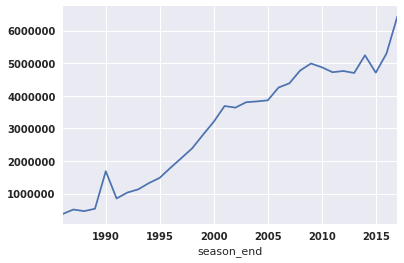

In [42]:
(data.groupby('season_end')['salary'].mean()).plot()

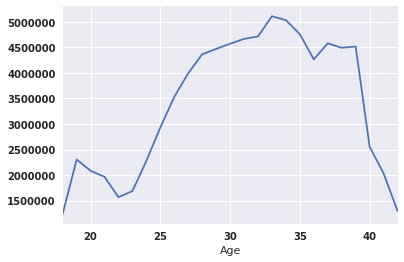

In [43]:
(data.groupby('Age')['salary'].mean()).plot()

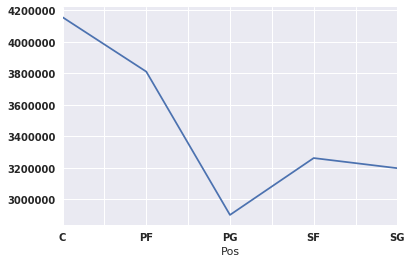

In [44]:
(stats_and_salaries.groupby('Pos')['salary'].mean()).plot()

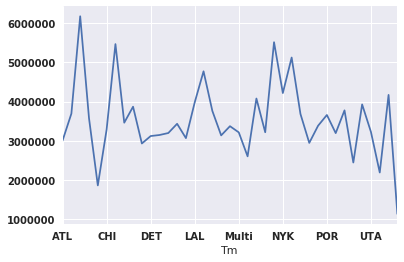

In [45]:
(stats_and_salaries.groupby('Tm')['salary'].mean()).plot()

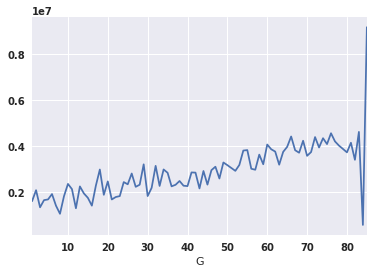

In [46]:
(stats_and_salaries.groupby('G')['salary'].mean()).plot()

//anaconda/lib/python2.7/site-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



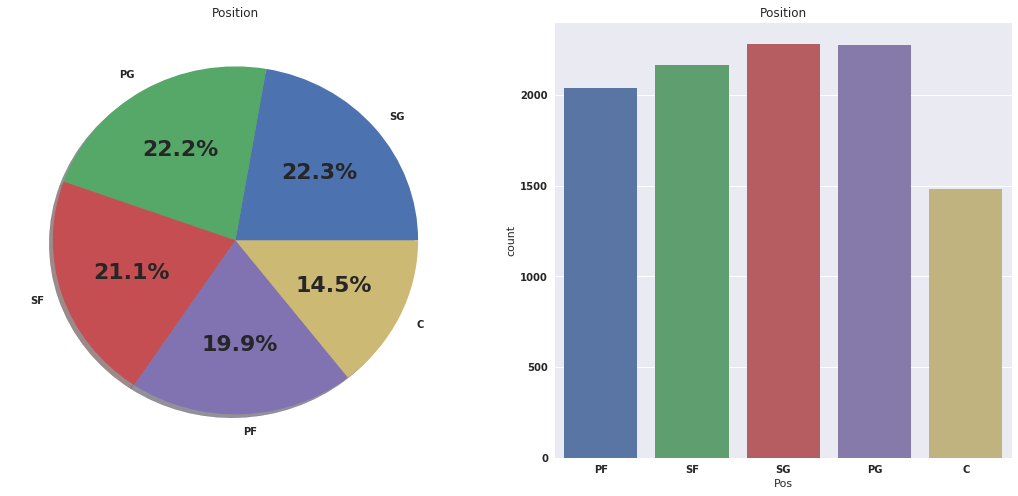

In [47]:
f,ax=plt.subplots(1,2,figsize=(18,8))
stats_and_salaries['Pos'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Position')
ax[0].set_ylabel('')
sns.countplot('Pos',data=stats_and_salaries,ax=ax[1])
ax[1].set_title('Position')
plt.show()

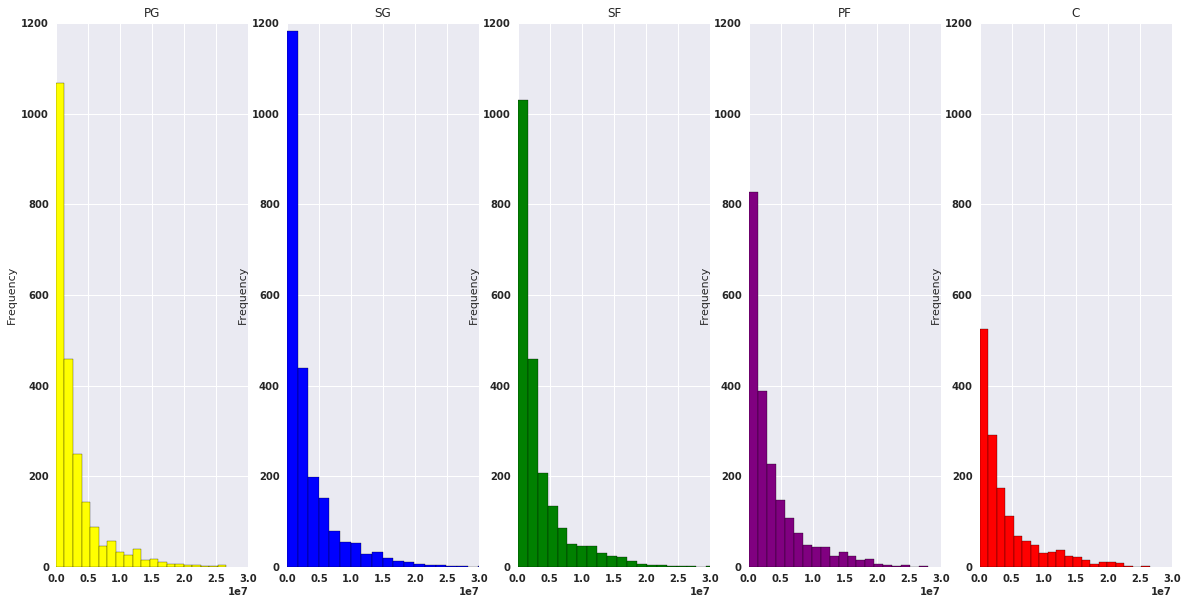

In [48]:
f,ax=plt.subplots(1,5,figsize=(20,10))

stats_and_salaries[stats_and_salaries['Pos']=='PG'].salary.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='yellow')
ax[0].set_title('PG')
ax[0].set_xlim([0, 30000000])
ax[0].set_ylim([0, 1200])

stats_and_salaries[stats_and_salaries['Pos']=='SG'].salary.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='blue')
ax[1].set_title('SG')

ax[1].set_xlim([0, 30000000])
ax[1].set_ylim([0, 1200])

stats_and_salaries[stats_and_salaries['Pos']=='SF'].salary.plot.hist(ax=ax[2],bins=20,edgecolor='black',color='green')
ax[2].set_title('SF')

ax[2].set_xlim([0, 30000000])
ax[2].set_ylim([0, 1200])

stats_and_salaries[stats_and_salaries['Pos']=='PF'].salary.plot.hist(ax=ax[3],bins=20,edgecolor='black',color='purple')
ax[3].set_title('PF')

ax[3].set_xlim([0, 30000000])
ax[3].set_ylim([0, 1200])

stats_and_salaries[stats_and_salaries['Pos']=='C'].salary.plot.hist(ax=ax[4],bins=20,edgecolor='black',color='red')
ax[4].set_title('C')

ax[4].set_xlim([0, 30000000])
ax[4].set_ylim([0, 1200])

plt.show()

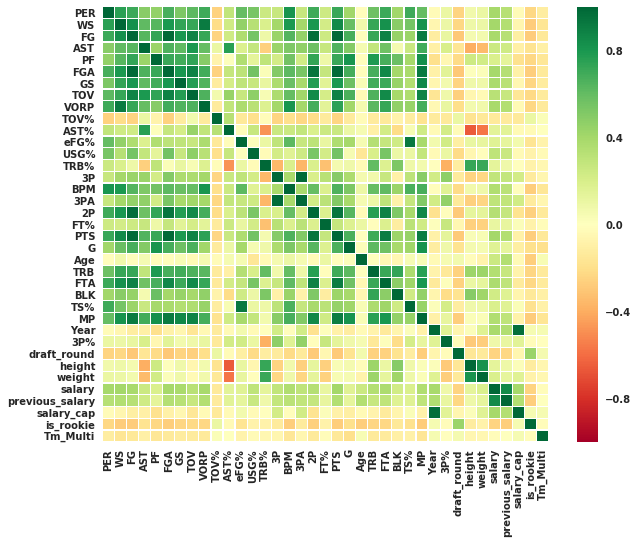

In [49]:
curr = data[[
 'PER',
 'WS',
 'FG',
 'AST',
 'PF',
 'FGA',
 'GS',
 'TOV',
 'VORP',
 'TOV%',
 'AST%',
 'eFG%',
 'USG%',
 'TRB%',
 '3P',
 'BPM',
 '3PA',
 '2P',
 'FT%',
 'PTS',
 'G',
 'Age',
 'TRB',
 'FTA',
 'BLK',
 'TS%',
 'MP',
 'Year',
 '3P%',
 'draft_round',
 'height',
 'weight',
 'salary',
 'previous_salary',
 'salary_cap',
 'is_rookie',
 'Tm_Multi']]

font = {'family' : 'normal',
        'size'   : 10}

plt.rc('font', **font)
sns.heatmap(curr.corr(),annot=False,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns




In [51]:
data.head()
import math
data['salary'] = data['salary'].apply(np.log)
data['previous_salary'] = data['previous_salary'].apply(np.log)
data['salary_cap'] = data['salary_cap'].apply(np.log)

In [52]:
data.describe()

,Year,STL%,FT,PER,2PA,WS,FG,DRB,ORB%,OBPM,AST,3PAr,PF,FGA,GS,TOV,VORP,TOV%,AST%,eFG%,FG%,USG%,DRB%,2P%,TRB%,ORB,3P,BPM,3PA,2P,BLK%,DBPM,FT%,PTS,OWS,DWS,G,STL,Age,TRB,FTA,BLK,FTr,TS%,MP,3P%,draft_pick,draft_round,draft_year,height,weight,season_end,salary,salary_cap,previous_salary,is_rookie,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG,Tm_ATL,Tm_BOS,Tm_BRK,Tm_CHA,Tm_CHH,Tm_CHI,Tm_CHO,Tm_CLE,Tm_DAL,Tm_DEN,Tm_DET,Tm_GSW,Tm_HOU,Tm_IND,Tm_LAC,Tm_LAL,Tm_MEM,Tm_MIA,Tm_MIL,Tm_MIN,Tm_Multi,Tm_NJN,Tm_NOH,Tm_NOK,Tm_NOP,Tm_NYK,Tm_OKC,Tm_ORL,Tm_PHI,Tm_PHO,Tm_POR,Tm_SAC,Tm_SAS,Tm_SEA,Tm_TOR,Tm_UTA,Tm_VAN,Tm_WAS,Tm_WSB
count,10235.000000,10235.000000,10235.000000,10235.00000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.00000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000,10235.000000
mean,2003.174402,1.706575,119.657548,13.53659,417.388178,3.186488,236.070054,179.895652,5.459091,-0.844211,144.811138,0.205981,129.555056,517.459209,30.904446,89.994138,0.814284,13.997460,14.427259,0.475506,0.440847,19.434167,13.453913,0.464703,9.456287,70.007328,35.354665,-1.230435,100.071031,200.715388,1.339726,-0.386067,0.742021,627.152320,1.692936,1.493591,59.750073,49.814265,26.883146,249.902980,156.923009,28.145579,0.298285,0.516302,1480.597167,0.261483,26.311773,1.541475,1997.635369,78.569321,213.987005,2003.174402,14.353567,17.309744,13.529065,0.213874,0.144504,0.199023,0.222179,0.211334,0.222960,0.032731,0.030679,0.006155,0.009477,0.013483,0.031070,0.003517,0.031461,0.031265,0.030386,0.031851,0.030386,0.031461,0.034196,0.033219,0.03234,0.017684,0.029018,0.030191,0.028627,0.108061,0.025403,0.008891,0.001954,0.004397,0.029702,0.009380,0.027553,0.029311,0.029409,0.030972,0.029507,0.034099,0.021788,0.021397,0.031754,0.006155,0.020225,0.010845
std,8.791883,0.751480,115.257191,4.71245,335.539621,3.213098,182.932521,145.006457,3.777471,2.827917,149.404913,0.187900,73.924903,383.976593,30.382222,66.545537,1.548194,4.611941,9.373128,0.064589,0.064894,4.869655,5.638250,0.067776,4.319786,67.010965,46.073510,3.473886,120.952453,168.042035,1.380998,1.814475,0.121235,491.852219,2.281109,1.276464,21.685677,38.545900,4.110410,204.733127,145.990454,37.597954,0.154026,0.061960,892.724342,0.165514,21.940065,0.849142,9.601312,3.633406,26.262277,8.791883,1.257435,0.748891,2.001747,0.410059,0.351617,0.399285,0.415731,0.408274,0.416252,0.177940,0.172455,0.078218,0.096894,0.115337,0.173515,0.059206,0.174568,0.174042,0.171655,0.175613,0.171655,0.174568,0.181742,0.179218,0.17691,0.131808,0.167865,0.171120,0.166765,0.310472,0.157354,0.093877,0.044164,0.066165,0.169772,0.096398,0.163695,0.168686,0.168958,0.173251,0.169230,0.181492,0.145998,0.144711,0.175352,0.078218,0.140775,0.103579
min,1986.000000,0.000000,0.000000,-26.80000,0.000000,-2.100000,0.000000,0.000000,0.000000,-21.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.100000,0.000000,0.000000,0.000000,0.000

In [53]:
data.head()

,Year,player_name,STL%,FT,PER,2PA,WS,FG,DRB,ORB%,OBPM,AST,3PAr,PF,FGA,GS,TOV,VORP,TOV%,AST%,eFG%,FG%,USG%,DRB%,2P%,TRB%,ORB,3P,BPM,Tm,3PA,2P,BLK%,DBPM,FT%,PTS,OWS,DWS,G,STL,Age,TRB,FTA,BLK,FTr,TS%,Pos,MP,3P%,player_id_x,birthDate,birthPlace,college,draft_pick,draft_round,draft_team,draft_year,height,highSchool,position,shoots,weight,id_year_combo,player_id_y,league,season_end,salary,salary_cap,previous_salary,is_rookie,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG,Tm_ATL,Tm_BOS,Tm_BRK,Tm_CHA,Tm_CHH,Tm_CHI,Tm_CHO,Tm_CLE,Tm_DAL,Tm_DEN,Tm_DET,Tm_GSW,Tm_HOU,Tm_IND,Tm_LAC,Tm_LAL,Tm_MEM,Tm_MIA,Tm_MIL,Tm_MIN,Tm_Multi,Tm_NJN,Tm_NOH,Tm_NOK,Tm_NOP,Tm_NYK,Tm_OKC,Tm_ORL,Tm_PHI,Tm_PHO,Tm_POR,Tm_SAC,Tm_SAS,Tm_SEA,Tm_TOR,Tm_UTA,Tm_VAN,Tm_WAS,Tm_WSB
6762,1986.0,A.C. Green,1.5,102.0,11.8,382.0,3.3,209.0,221.0,12.4,-0.5,54.0,0.015,229.0,388.0,1.0,99.0,0.9,17.7,4.2,0.540,0.539,14.7,15.5,0.545,14.0,160.0,1.0,0.3,LAL,6.0,208.0,1.7,0.8,0.611,521.0,1.4,2.0,82.0,49.0,22.0,381.0,167.0,49.0,0.430,0.564,PF,1542.0,0.167,greenac01,"October 4, 1963","Portland, Oregon",Oregon State University,23,1,Los Angeles Lakers,1985.0,81,"Benson Polytechnic in Portland, Oregon",Power Forward,Right,220,"(greenac01, 1986)",greenac01,NBA,1986.0,11.765628,15.258422,11.156251,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6763,1986.0,Adrian Dantley,1.1,630.0,24.6,1442.0,12.8,818.0,217.0,7.2,6.7,264.0,0.008,206.0,1453.0,75.0,231.0,4.8,11.4,16.7,0.563,0.563,30.0,8.5,0.567,7.8,178.0,1.0,4.9,UTA,11.0,817.0,0.1,-1.7,0.791,2267.0,10.4,2.3,76.0,64.0,29.0,395.0,796.0,4.0,0.548,0.629,SF,2744.0,0.091,dantlad01,"February 28, 1956","Washington, District of Columbia",University of Notre Dame,6,1,Buffalo Braves,1976.0,77,"DeMatha Catholic in Hyattsville, Maryland",Small Forward,Right,208,"(dantlad01, 1986)",dantlad01,NBA,1986.0,13.764217,15.258422,11.156251,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6764,1986.0,Al Wood,1.6,187.0,13.5,780.0,2.5,355.0,164.0,5.3,-1.7,114.0,0.045,171.0,817.0,34.0,107.0,-0.4,10.4,10.3,0.438,0.435,24.6,11.4,0.449,8.3,80.0,5.0,-2.8,SEA,37.0,350.0,0.7,-1.1,0.782,902.0,0.7,1.8,78.0,57.0,27.0,244.0,239.0,19.0,0.293,0.489,SG,1749.0,0.135,woodal01,"June 2, 1958","Gray, Georgia",University of North Carolina,4,1,Atlanta Hawks,1981.0,78,"Jones County in Gray, Georgia",Small Forward,Right,193,"(woodal01, 1986)",woodal01,NBA,1986.0,13.017003,15.258422,13.017003,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6765,1986.0,Albert King,1.3,167.0,13.3,938.0,1.9,438.0,250.0,6.5,-1.5,181.0,0.024,205.0,961.0,69.0,181.0,0.0,14.7,13.4,0.458,0.456,24.6,14.1,0.463,10.3,116.0,4.0,-2.0,NJN,23.0,434.0,0.7,-0.6,0.823,1047.0,0.0,1.9,73.0,58.0,26.0,366.0,203.0,24.0,0.211,0.498,SF,1998.0,0.174,kingal01,"December 17, 1959","Brooklyn, New York",University of Maryland,10,1,New Jersey Nets,1981.0,78,"Fort Hamilton in Brooklyn, New York",Small Forward,Right,190,"(kingal01, 1986)",kingal01,NBA,1986.0,13.849912,15.258422,12.524526,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6766,1986.0,Alex English,1.1,511.0,21.7,1883.0,9.8,951.0,213.0,6.3,4.1,320.0,0.003,235.0,1888.0,81.0,249.0,3.2,10.4,17.0,0.504,0.504,30.5,7.7,0.505,7.0,192.0,1.0,2.1,DEN,5.0,950.0,0.5,-2.0,0.862,2414.0,7.6,2.3,81.0,73.0,32.0,405.0,593.0,29.0,0.314,0.562,SF,3024.0,0.200,englial01,"January 5, 1954","Columbia, South Carolina",University of South Carolina,23,2,Milwaukee Bucks,1976.0,79,"Dreher in Columbia, South Carolina",Small Forward,Right,190,"(englial01, 1986)",englial01,NBA,1986.0,13.623139,15.258422,13.579788,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
train_str,test_str=train_test_split(data,test_size=0.3,random_state=2)
train = train_str.drop(columns=['highSchool','draft_team', 'birthPlace', 'birthDate',
           'player_id_x','college','id_year_combo','player_id_y','league'])
train = train.drop(columns=['player_name','position','shoots','Tm','Pos','draft_year'])

test = test_str.drop(columns=['player_name','position','shoots','Tm','Pos','draft_year','highSchool','draft_team', 'birthPlace', 'birthDate',
           'player_id_x','college','id_year_combo','player_id_y','league'])

In [55]:
origX_train = train.drop("salary", axis=1)
y_train = train['salary']
origX_test = test.drop("salary", axis=1)
y_test = test['salary']
x=data.drop("salary", axis=1)
y=data['salary']

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(origX_train)
X_train = scalar.transform(origX_train)
X_test = scalar.transform(origX_test)

//anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning:

Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.

//anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: DataConversionWarning:

Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.

//anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: DataConversionWarning:

Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.



In [56]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7164, 98), (3071, 98), (7164,), (3071,))

In [57]:
X_test

array([[ 0.6527008 ,  1.04489283,  2.12182373, ..., -0.08467568,
        -0.14322297, -0.10423514],
       [-1.16726554,  2.62385832,  3.08374374, ..., -0.08467568,
        -0.14322297, -0.10423514],
       [ 0.88019659,  0.78173191,  0.6832767 , ..., -0.08467568,
        -0.14322297, -0.10423514],
       ...,
       [ 1.56268397, -0.53407266, -0.54728763, ..., -0.08467568,
        -0.14322297, -0.10423514],
       [-0.82602185, -0.4024922 ,  0.27597724, ..., -0.08467568,
        -0.14322297, -0.10423514],
       [ 0.31145711,  0.25541008, -0.72060655, ..., -0.08467568,
        -0.14322297, -0.10423514]])

In [58]:
y_test

16573    16.066802
9588     15.201805
17362    14.661859
9016     13.641157
17892    13.633644
15856    14.318538
17843    16.589505
9477     14.457364
12584    13.910821
16605    15.615470
11020    12.419166
18945    15.262430
11998    13.199324
7913     13.384728
20517    11.395695
18420    15.068274
9439     11.849398
10542    12.071970
6807     11.407565
12435    15.250595
15016    14.648847
11611    14.277671
16360    13.858685
19217    13.727880
12860    14.626441
19934    13.761346
8056     12.834681
17733    14.994166
18240    16.388721
17451    16.468753
11663    12.514476
10742    12.765688
11128    12.301383
15319    14.328334
11145    15.761421
14304    14.374418
11876    12.696798
14500    16.418200
8867     13.637579
20576    15.615569
14868    12.849449
10733    13.071070
9995     12.834681
8018     11.512925
12964    14.603968
10190    14.115615
20491    16.839588
14431    14.816422
11650    14.030622
9056     14.297319
20537    16.380460
14225    15.191755
9298     13.

In [59]:
n_folds = 5

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
scorer = make_scorer(mean_squared_error,greater_is_better = False)
def rmse_CV_train(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model,X_train,y_train,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)
def rmse_CV_test(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model,X_test,y_test,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)

In [60]:
lr = LinearRegression()
lr.fit(X_train,y_train)
test_pre = lr.predict(X_test)
train_pre = lr.predict(X_train)
print('RMSE on train',rmse_CV_train(lr).mean())
print('RMSE on test',rmse_CV_test(lr).mean())

('RMSE on train', 0.6524498407813227)
('RMSE on test', 0.6668406708413877)


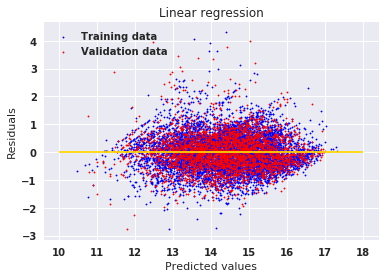

In [61]:
plt.scatter(train_pre, train_pre - y_train, c = "blue",s=2,  label = "Training data")
plt.scatter(test_pre, test_pre - y_test, c = "red",s=2,  label = "Validation data")


plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10, xmax = 18, color = "gold")
plt.show()

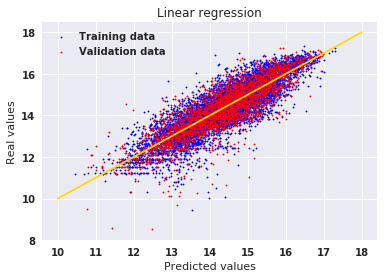

In [62]:
# Plot predictions - Real values
plt.scatter(train_pre, y_train, c = "blue",s=2,  label = "Training data")
plt.scatter(test_pre, y_test, c = "red",s=2,  label = "Validation data")


plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10, 18], [10, 18], c = "gold")
plt.show()

In [63]:
ridge = RidgeCV(alphas = [.0001,.001,.01,.1,1,10,100,1000])
ridge.fit(X_train,y_train)
alpha = ridge.alpha_
print('best alpha',alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4],cv = 5)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)
print("Ridge MAE on Training set :" + str(rmse_CV_train(ridge).mean()))
print("Ridge MAE on Test set :" + str(rmse_CV_test(ridge).mean()))
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

('best alpha', 100.0)
Try again for more precision with alphas centered around 100.0
('Best alpha :', 60.0)
Ridge MAE on Training set :0.6507205833850425
Ridge MAE on Test set :0.6657405497350786


In [64]:
coef = pd.Series(ridge.coef_, index = origX_train.columns)

print("Ridge picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Ridge picked 98 variables and eliminated the other 0 variables


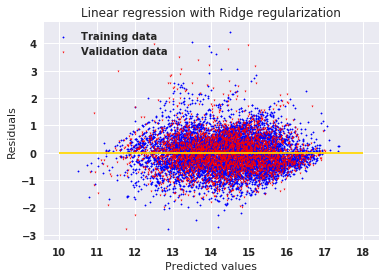

In [65]:
# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue",s=2,  label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "red",s=2, marker = "v", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10, xmax = 18, color = "gold")
plt.show()

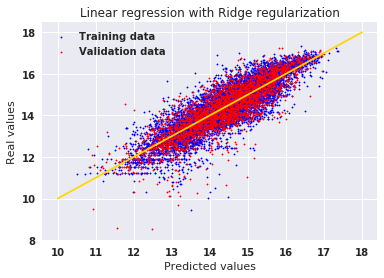

In [66]:
# Plot predictions - Real values
plt.scatter(y_train_rdg, y_train, c = "blue",s=2,  label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "red",s=2,  label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10, 18], [10, 18], c = "gold")
plt.show()

In [67]:
lasso = LassoCV(alphas = [.0001,.001,.01,.1,1,10,100])
lasso.fit(X_train,y_train)
alpha = lasso.alpha_
print('best alpha',alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4],cv = 5)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)
print("Lasso RMSE on Training set :" + str(rmse_CV_train(lasso).mean()))
print("Lasso RMSE on Test set :" + str(rmse_CV_test(lasso).mean()))
y_train_rdg = lasso.predict(X_train)
y_test_rdg = lasso.predict(X_test)

//anaconda/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.

//anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



('best alpha', 0.001)
Try again for more precision with alphas centered around 0.001
('Best alpha :', 0.001)
Lasso RMSE on Training set :0.6507883635979986
Lasso RMSE on Test set :0.664813222143265


In [68]:
coef = pd.Series(lasso.coef_, index = origX_train.columns)

print("Ridge picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Ridge picked 76 variables and eliminated the other 22 variables


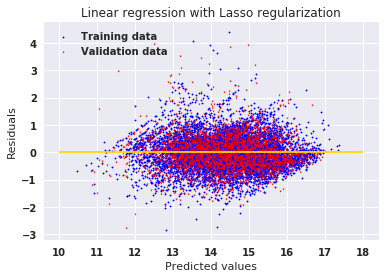

In [69]:
# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue",s=2,  label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "red",s=2, marker = "v", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10, xmax = 18, color = "gold")
plt.show()

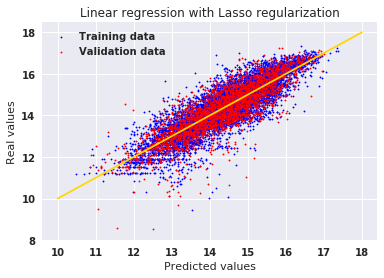

In [70]:
# Plot predictions - Real values
plt.scatter(y_train_rdg, y_train, c = "blue",s=2,  label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "red",s=2,  label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10, 18], [10, 18], c = "gold")
plt.show()

In [71]:
from sklearn.ensemble import RandomForestRegressor
regr_rf = RandomForestRegressor(n_estimators=50, max_depth=40,
                                random_state=2,verbose=100)
regr_rf.fit(X_train,y_train)
test_pre = regr_rf.predict(X_test)
train_pre = regr_rf.predict(X_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 50
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
building tree 2 of 50
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
building tree 3 of 50
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
building tree 4 of 50
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.1s remaining:    0.0s
building tree 5 of 50
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.4s remaining:    0.0s
building tree 6 of 50
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.6s remaining:    0.0s
building tree 7 of 50
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.9s remaining:    0.0s
building tree 8 of 50
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.1s remaining:    0.0s
building tree 9 of 50
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.4s remaining:    0.0s
b

In [72]:
import sklearn
print('RMSE on train',sklearn.metrics.mean_squared_error(y_train, train_pre))
print('RMSE on test',sklearn.metrics.mean_squared_error(y_test, test_pre))

('RMSE on train', 0.04152417013133181)
('RMSE on test', 0.3036541721254943)


In [73]:
from sklearn.ensemble import RandomForestRegressor
regr_rf = RandomForestRegressor(n_estimators=200, max_depth=6,
                                random_state=2,verbose=100)
regr_rf.fit(X_train,y_train)
test_pre = regr_rf.predict(X_test)
train_pre = regr_rf.predict(X_train)
print('RMSE on train',sklearn.metrics.mean_squared_error(y_train, train_pre))
print('RMSE on test',sklearn.metrics.mean_squared_error(y_test, test_pre))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 200
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
building tree 2 of 200
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
building tree 3 of 200
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
building tree 4 of 200
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
building tree 5 of 200
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s remaining:    0.0s
building tree 6 of 200
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.7s remaining:    0.0s
building tree 7 of 200
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.8s remaining:    0.0s
building tree 8 of 200
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.9s remaining:    0.0s
building tree 9 of 200
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.0s remaining: 

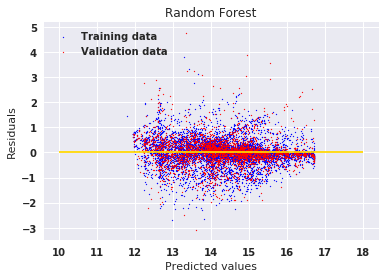

In [74]:
plt.scatter(train_pre, train_pre - y_train, c = "blue",s=1,  label = "Training data")
plt.scatter(test_pre,test_pre - y_test, c = "red",s=1,  label = "Validation data")
plt.title("Random Forest")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10, xmax = 18, color = "gold")
plt.show()

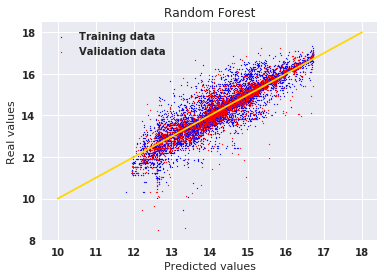

In [75]:
# Plot predictions - Real values
plt.scatter(train_pre, y_train, c = "blue",s=1,  label = "Training data")
plt.scatter(test_pre, y_test, c = "red",s=1,  label = "Validation data")
plt.title("Random Forest")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10, 18], [10, 18], c = "gold")
plt.show()

In [76]:
from xgboost import XGBRegressor

my_model = XGBRegressor( n_estimators=100,subsample = .7,max_depth = 30,silent = False)
# Add silent=True to avoid printing out updates with each cycle


In [77]:
my_model.fit(X_train, y_train,eval_set=[(X_test, y_test)],verbose = True)

[0]	validation_0-rmse:12.4952
[1]	validation_0-rmse:11.2479


//anaconda/lib/python2.7/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

//anaconda/lib/python2.7/site-packages/xgboost/core.py:588: FutureWarning:

Series.base is deprecated and will be removed in a future version



[2]	validation_0-rmse:10.1247
[3]	validation_0-rmse:9.11601
[4]	validation_0-rmse:8.20798
[5]	validation_0-rmse:7.3912
[6]	validation_0-rmse:6.65579
[7]	validation_0-rmse:5.99474
[8]	validation_0-rmse:5.4001
[9]	validation_0-rmse:4.86599
[10]	validation_0-rmse:4.38623
[11]	validation_0-rmse:3.95418
[12]	validation_0-rmse:3.56701
[13]	validation_0-rmse:3.21906
[14]	validation_0-rmse:2.90808
[15]	validation_0-rmse:2.62776
[16]	validation_0-rmse:2.37634
[17]	validation_0-rmse:2.15224
[18]	validation_0-rmse:1.95189
[19]	validation_0-rmse:1.77479
[20]	validation_0-rmse:1.61737
[21]	validation_0-rmse:1.47612
[22]	validation_0-rmse:1.35389
[23]	validation_0-rmse:1.2461
[24]	validation_0-rmse:1.14916
[25]	validation_0-rmse:1.06399
[26]	validation_0-rmse:0.989835
[27]	validation_0-rmse:0.926361
[28]	validation_0-rmse:0.871709
[29]	validation_0-rmse:0.824188
[30]	validation_0-rmse:0.782422
[31]	validation_0-rmse:0.745407
[32]	validation_0-rmse:0.716573
[33]	validation_0-rmse:0.691088
[34]	valida

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=30,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=False,
       subsample=0.7)

In [78]:
print('RMSE on test',rmse_CV_test(my_model).mean())

('RMSE on test', 0.5995877366017074)


In [79]:
xgb1 = XGBRegressor()

from sklearn.model_selection import GridSearchCV
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.04,.07,.1,.15,.2,.3], #so called `eta` value
              'max_depth': [3, 4, 5, 6],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [100]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 1,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  1.6min finished


0.8183599632878127
{'colsample_bytree': 0.7, 'silent': 1, 'learning_rate': 0.07, 'nthread': 4, 'min_child_weight': 4, 'n_estimators': 100, 'subsample': 0.7, 'objective': 'reg:linear', 'max_depth': 6}


In [80]:
#my_model = XGBRegressor(early_stopping_rounds = 10000, n_estimators=100000,learning_rate=0.1)
#my_model.fit(X_train, y_train, early_stopping_rounds=1000, 
#             eval_set=[(X_test, y_test)], verbose=True)


In [81]:
#predictions = my_model.predict(X_test)
#print('RMSE on train',rmse_CV_train(my_model).mean())
#print('RMSE on test',rmse_CV_test(my_model).mean())

In [82]:
type(xgb1)

xgboost.sklearn.XGBRegressor

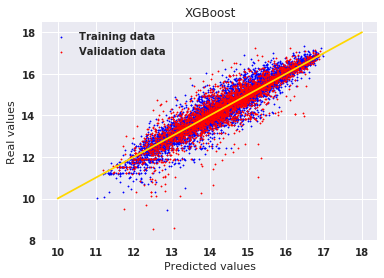

In [83]:
my_model = xgb_grid.best_estimator_
# Plot predictions - Real values
plt.scatter(my_model.predict(X_train), y_train, c = "blue",s=2,  label = "Training data")
plt.scatter(my_model.predict(X_test), y_test, c = "red",s=2,  label = "Validation data")
plt.title("XGBoost")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10, 18], [10, 18], c = "gold")
plt.show()

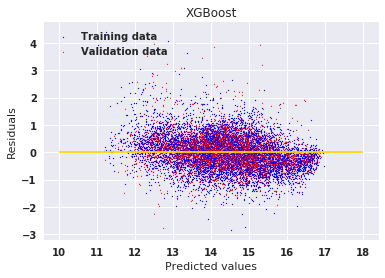

In [84]:
# Plot residuals
plt.scatter(my_model.predict(X_train), y_train_rdg - y_train, c = "blue",s=1,  label = "Training data")
plt.scatter(my_model.predict(X_test), y_test_rdg - y_test, c = "red",s=1, marker = "v", label = "Validation data")
plt.title("XGBoost")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10, xmax = 18, color = "gold")
plt.show()

In [85]:
test_pre = my_model.predict(X_test)
train_pre = my_model.predict(X_train)
print('RMSE on train',sklearn.metrics.mean_squared_error(y_train, train_pre))
print('RMSE on test',sklearn.metrics.mean_squared_error(y_test, test_pre))

('RMSE on train', 0.16660753551029184)
('RMSE on test', 0.3076957055061961)


In [86]:
(test_pre - y_test).describe()

count    3071.000000
mean        0.009840
std         0.554706
min        -2.362633
25%        -0.241242
50%        -0.008634
75%         0.213933
max         4.486462
Name: salary, dtype: float64

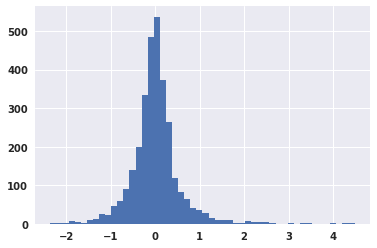

In [87]:
(test_pre - y_test).hist(bins = 50)